In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.tree import plot_tree

In [2]:
feature_name_df = pd.read_csv('./ML data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
feature_name = feature_name_df.iloc[:, 1].values.tolist()
feature_name

['tBodyAcc-mean()-X',
 'tBodyAcc-mean()-Y',
 'tBodyAcc-mean()-Z',
 'tBodyAcc-std()-X',
 'tBodyAcc-std()-Y',
 'tBodyAcc-std()-Z',
 'tBodyAcc-mad()-X',
 'tBodyAcc-mad()-Y',
 'tBodyAcc-mad()-Z',
 'tBodyAcc-max()-X',
 'tBodyAcc-max()-Y',
 'tBodyAcc-max()-Z',
 'tBodyAcc-min()-X',
 'tBodyAcc-min()-Y',
 'tBodyAcc-min()-Z',
 'tBodyAcc-sma()',
 'tBodyAcc-energy()-X',
 'tBodyAcc-energy()-Y',
 'tBodyAcc-energy()-Z',
 'tBodyAcc-iqr()-X',
 'tBodyAcc-iqr()-Y',
 'tBodyAcc-iqr()-Z',
 'tBodyAcc-entropy()-X',
 'tBodyAcc-entropy()-Y',
 'tBodyAcc-entropy()-Z',
 'tBodyAcc-arCoeff()-X,1',
 'tBodyAcc-arCoeff()-X,2',
 'tBodyAcc-arCoeff()-X,3',
 'tBodyAcc-arCoeff()-X,4',
 'tBodyAcc-arCoeff()-Y,1',
 'tBodyAcc-arCoeff()-Y,2',
 'tBodyAcc-arCoeff()-Y,3',
 'tBodyAcc-arCoeff()-Y,4',
 'tBodyAcc-arCoeff()-Z,1',
 'tBodyAcc-arCoeff()-Z,2',
 'tBodyAcc-arCoeff()-Z,3',
 'tBodyAcc-arCoeff()-Z,4',
 'tBodyAcc-correlation()-X,Y',
 'tBodyAcc-correlation()-X,Z',
 'tBodyAcc-correlation()-Y,Z',
 'tGravityAcc-mean()-X',
 'tGravityA

In [3]:
feature_dup_df = feature_name_df.groupby('column_name').count()
feature_dup_df[feature_dup_df['column_index'] > 1].count()
feature_dup_df[feature_dup_df['column_index'] > 1].head()

,column_index
column_name,
"fBodyAcc-bandsEnergy()-1,16",3
"fBodyAcc-bandsEnergy()-1,24",3
"fBodyAcc-bandsEnergy()-1,8",3
"fBodyAcc-bandsEnergy()-17,24",3
"fBodyAcc-bandsEnergy()-17,32",3


In [4]:
def add_name_df(name_df):
    feature_dup_df = pd.DataFrame(data=name_df.groupby('column_name').cumcount(), columns=['dup_cnt'])
    feature_dup_df = feature_dup_df.reset_index()
    add_name_df = pd.merge(name_df.reset_index(), feature_dup_df, how='outer')
    add_name_df['column_name'] = add_name_df[['column_name', 'dup_cnt']].apply(lambda x :x[0]+'_'+str(x[1]) if x[1] > 0 else x[0] , axis=1)
    add_name_df = add_name_df.drop(['index'], axis=1)
    
    return add_name_df

In [5]:
def get_human_dataset():
    feature_name_df = pd.read_csv('./ML data/human_activity/features.txt', sep='\s+', header=None, names=['column_index', 'column_name'])
    
    new_name_df = add_name_df(feature_name_df)
    
    feature_name = new_name_df.iloc[:, 1].values.tolist()
    
    x_train = pd.read_csv('./ML data/human_activity/train/X_train.txt', sep='\s+', names=feature_name)
    x_test = pd.read_csv('./ML data/human_activity/test/X_test.txt', sep='\s+', names=feature_name)
    y_train = pd.read_csv('./ML data/human_activity/train/y_train.txt', sep='\s+', header=None, names=['action'])
    y_test = pd.read_csv('./ML data/human_activity/test/y_test.txt',  sep='\s+', header=None, names=['action'])
    
    return x_train, x_test, y_train, y_test

In [6]:
x_train, x_test, y_train, y_test = get_human_dataset()

In [7]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7352 entries, 0 to 7351
Columns: 561 entries, tBodyAcc-mean()-X to angle(Z,gravityMean)
dtypes: float64(561)
memory usage: 31.5 MB


In [8]:
dt_clf = DecisionTreeClassifier(random_state=156)
dt_clf.fit(x_train, y_train)
pred = dt_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred)

print('{0:.4f}'.format(accuracy))

0.8548


In [9]:
y_train['action'].value_counts()

6    1407
5    1374
4    1286
1    1226
2    1073
3     986
Name: action, dtype: int64

In [10]:
dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 156,
 'splitter': 'best'}

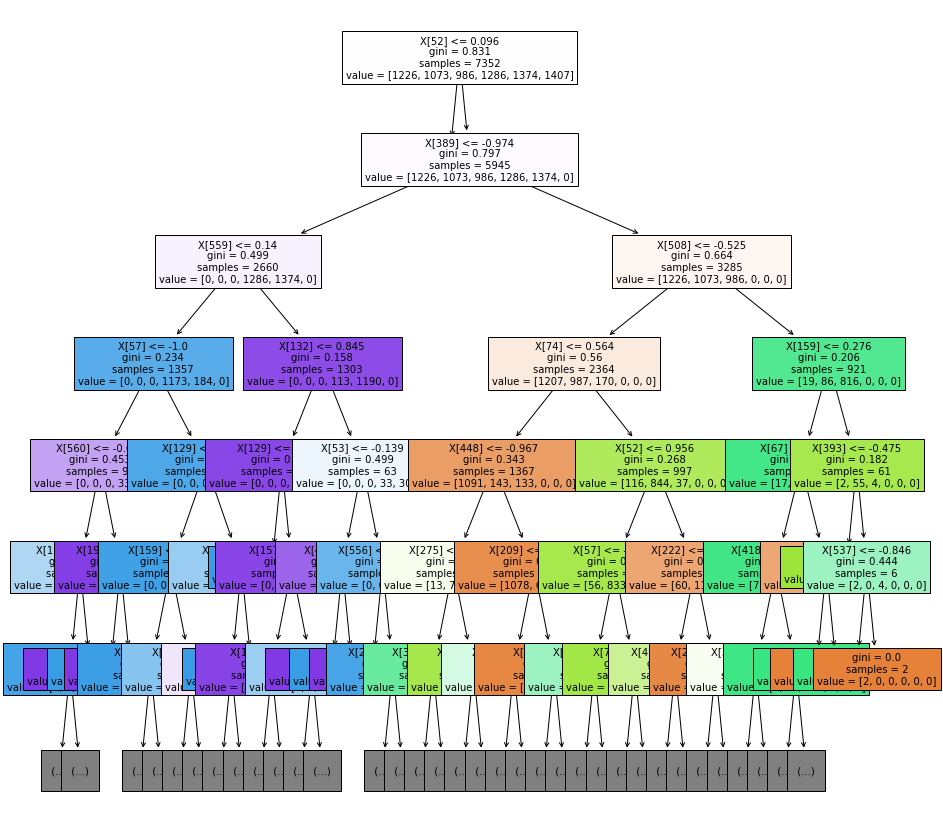

In [25]:
plt.figure(figsize=(15, 15))
tree = plot_tree(dt_clf, max_depth=6, fontsize=10,filled=True)

* 하이퍼 파라미터

In [12]:
params = {'max_depth' : [6, 8, 10, 12, 16, 20, 24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:  1.6min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=156),
             param_grid={'max_depth': [6, 8, 10, 12, 16, 20, 24]},
             scoring='accuracy', verbose=1)

In [13]:
grid_cv.best_params_

{'max_depth': 16}

In [14]:
grid_cv.best_score_

0.8513444970102249

In [15]:
cv_result_df = pd.DataFrame(grid_cv.cv_results_)
cv_result_df[['param_max_depth', 'mean_test_score']]

,param_max_depth,mean_test_score
0,6,0.850791
1,8,0.851069
2,10,0.851209
3,12,0.844135
4,16,0.851344
5,20,0.850800
6,24,0.849440


In [16]:
max_depth = [6, 8, 10, 12, 16, 20, 24]

for depth in max_depth:
    dt_clf = DecisionTreeClassifier(max_depth=depth, random_state=156)
    dt_clf.fit(x_train, y_train)
    pred = dt_clf.predict(x_test)
    accuracy = accuracy_score(y_test, pred)
    print(depth, ',', '{0:.4f}'.format(accuracy))

6 , 0.8558
8 , 0.8707
10 , 0.8673
12 , 0.8646
16 , 0.8575
20 , 0.8548
24 , 0.8548


In [17]:
params = {'max_depth' : [8, 12, 16, 20], 'min_samples_split': [16, 24]}
grid_cv = GridSearchCV(dt_clf, param_grid=params, scoring='accuracy', cv=5, verbose=1)
grid_cv.fit(x_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  40 out of  40 | elapsed:  1.9min finished


GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(max_depth=24, random_state=156),
             param_grid={'max_depth': [8, 12, 16, 20],
                         'min_samples_split': [16, 24]},
             scoring='accuracy', verbose=1)

In [18]:
'{0:.4f}'.format(grid_cv.best_score_)

'0.8549'

In [19]:
grid_cv.best_params_

{'max_depth': 8, 'min_samples_split': 16}

In [20]:
best_df_clf = grid_cv.best_estimator_
pred1 = best_df_clf.predict(x_test)
accuracy = accuracy_score(y_test, pred1)

'{0:.4f}'.format(accuracy)

'0.8717'

* 시각화

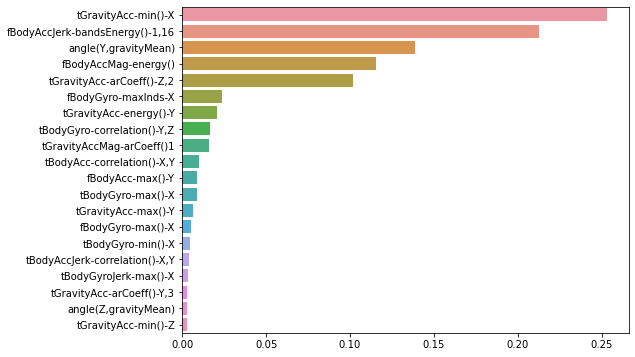

In [21]:
impo_values = best_df_clf.feature_importances_
impo = pd.Series(impo_values, index=x_train.columns)

top20 = impo.sort_values(ascending=False)[:20]

plt.figure(figsize=(8, 6))

sns.barplot(x=top20, y=top20.index)
plt.show()